# Segunda entrega - Materiales y consigna

En esta segunda entrega vamos a hacer un análisis de reviews en Yelp.

Dado el siguiente dataset https://drive.google.com/file/d/1sVeJE4zd1fmLnOgYI5QlQeaeaTGa8kIE/view?usp=sharing:

El análisis, como mínimo, debe incluir: 
- Keywords y tópicos por negocio (business id) 
- Sentimiento de cada review 
- Entidades por review 
- Negocio con más comentarios positivos y negocio con más comentarios negativos

--------------------------------------------------------------------------------

In [1]:
#!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1sVeJE4zd1fmLnOgYI5QlQeaeaTGa8kIE' -O reviews.csv

In [2]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/Blassaj/Icaro_Data-Science/main/Sprint%202/reviews.csv", parse_dates = ['date'], dayfirst = False)
df.head()

user_id               review_id  \
0  PUFPaY9KxDAcGqfsorJp3Q  Ya85v4eqdd6k9Od8HbQjyA   
1  Iu6AxdBYGR4A0wspR9BYHA  KPvLNJ21_4wbYNctrOwWdQ   
2  auESFwWvW42h6alXgFxAXQ  fFSoGV46Yxuwbr3fHNuZig   
3  uK8tzraOp4M5u3uYrqIBXg  Di3exaUCFNw1V4kSNW5pgA   
4  I_47G-R2_egp7ME5u_ltew  0Lua2-PbqEQMjD9r89-asw   

                                                text  votes.cool  \
0  Mr Hoagie is an institution. Walking in, it do...           0   
1  Excellent food. Superb customer service. I mis...           0   
2  Yes this place is a little out dated and not o...           0   
3  All the food is great here. But the best thing...           0   
4  We checked this place out this past Monday for...           0   

              business_id  votes.funny  stars       date    type  votes.useful  
0  5UmKMjUEUNdYWqANhGckJw            0      4 2012-08-01  review             0  
1  5UmKMjUEUNdYWqANhGckJw            0      5 2014-02-13  review             0  
2  5UmKMjUEUNdYWqANhGckJw            0      5 2015-10-31  review             0  
3  UsFtqoBl7naz8AVUBZMjQQ            0      5 2013-11-08  review             0  
4  UsFtqoBl7naz8AVUBZMjQQ            0      3 2014-03-29  review             0

# Análisis de los atributos presentes en el dataset.

In [3]:
#Cantidad de registros (filas) y atributos (columnas) del dataset
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df.shape

(27290, 10)

In [4]:
#Atributos del dataset
df.columns

Index(['user_id', 'review_id', 'text', 'votes.cool', 'business_id',
       'votes.funny', 'stars', 'date', 'type', 'votes.useful'],
      dtype='object')

In [5]:
#Tipo de dato de cada atributo
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27290 entries, 0 to 27289
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   user_id       27290 non-null  object        
 1   review_id     27290 non-null  object        
 2   text          27290 non-null  object        
 3   votes.cool    27290 non-null  int64         
 4   business_id   27290 non-null  object        
 5   votes.funny   27290 non-null  int64         
 6   stars         27290 non-null  int64         
 7   date          27290 non-null  datetime64[ns]
 8   type          27290 non-null  object        
 9   votes.useful  27290 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 2.1+ MB


In [6]:
#Cantidad de registros nulos por atributo
df.isna().sum()

user_id         0
review_id       0
text            0
votes.cool      0
business_id     0
votes.funny     0
stars           0
date            0
type            0
votes.useful    0
dtype: int64

En cuanto a valores nulos, no se detecta faltante de datos en ninguno de los atributos del dataset.

Atributos tipo numéricos (categóricos):
*   votes.cool: cantidad de votos "cool".
*   votes.funny: cantidad de votos "funny".
*   votes.useful: cantidad de votos "useful".
*   stars: rankeo del 1 al 5 (excepto: ordinal).

Atributos tipo string:
*   user_id: identificación del usuario.
*   review_id: identificación de la review.
*   text: review textual.
*   business_id: identificación del negocio.
*   date: fecha en la que se cargo la review.
*   type: tipo de registro (en este caso reviews).



## Análisis de estadística descriptiva de las variables.

In [7]:
#Parámetros estadísticos de los atributos numéricos categóricos del dataset.
round(df.describe(),2)

votes.cool  votes.funny     stars  votes.useful
count    27290.00     27290.00  27290.00      27290.00
mean         0.39         0.32      3.62          0.83
std          1.26         1.12      1.32          1.61
min          0.00         0.00      1.00          0.00
25%          0.00         0.00      3.00          0.00
50%          0.00         0.00      4.00          0.00
75%          0.00         0.00      5.00          1.00
max         61.00        52.00      5.00         52.00

In [8]:
#Parámetros estadísticos de los atributos tipo string.
df.describe(include= 'O')

user_id               review_id  \
count                    27290                   27290   
unique                   14861                   27290   
top     iTmWHtltCtk0Gm55AOxrUA  Ya85v4eqdd6k9Od8HbQjyA   
freq                       113                       1   

                                                     text  \
count                                               27290   
unique                                              27269   
top     Must try the homemade cream puffs!\nGreat food...   
freq                                                    2   

                   business_id    type  
count                    27290   27290  
unique                    1320       1  
top     3Q0QQPnHcJuX1DLCL9G9Cg  review  
freq                      1068   27290

### Visualización de atributos numéricos categóricos y ordinales.

In [9]:
#Generamos una función para crear gráficos de columnas.
def col_graf(atributo, dataset):
  plt.figure(figsize=(20,4))
  sns.countplot(x= atributo, data= dataset)
  return plt.show()

#### Gráfico de columna "votes.funny"

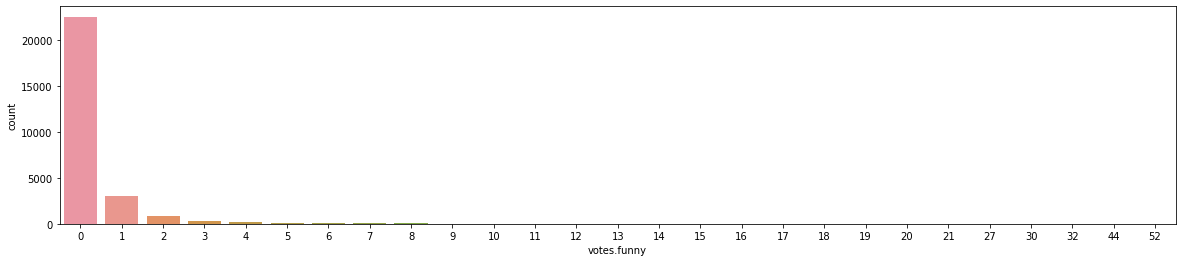

In [10]:
col_graf('votes.funny', df)

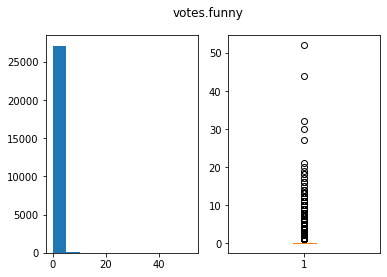

In [11]:
  # Graficos de histograma y boxplot
  fig, axes = plt.subplots(nrows= 1, ncols= 2)
  fig.suptitle('votes.funny')
  axes[0].hist(df['votes.funny'])
  axes[1].boxplot(x= 'votes.funny', data= df)
  plt.show()

In [12]:
#Proporción de votes.funny en las reviews
df['votes.funny'].value_counts(normalize= True)[0:5]

# +80% de las reviews no tienen este voto

0    0.827666
1    0.111286
2    0.032759
3    0.011030
4    0.006632
Name: votes.funny, dtype: float64

#### Gráfico de columna "votes.useful".

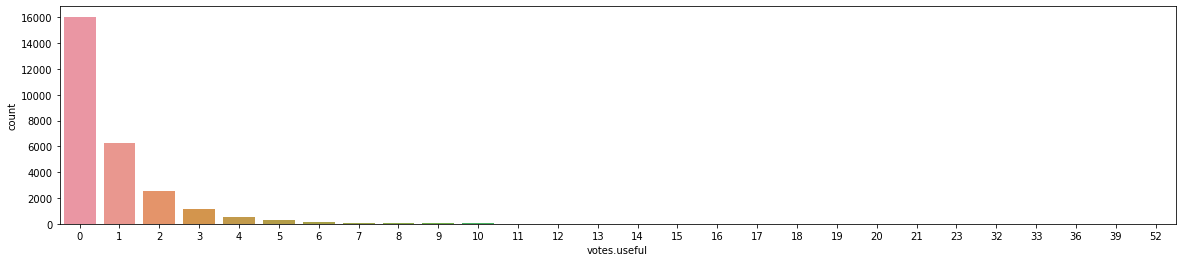

In [13]:
col_graf('votes.useful', df)

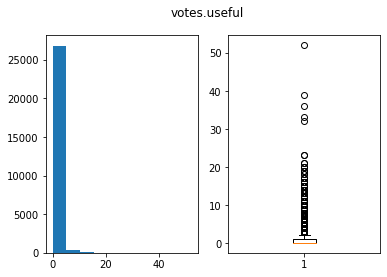

In [14]:
  # Graficos de histograma y boxplot
  fig, axes = plt.subplots(nrows= 1, ncols= 2)
  fig.suptitle('votes.useful')
  axes[0].hist(df['votes.useful'])
  axes[1].boxplot(x= 'votes.useful', data= df)
  plt.show()

In [15]:
#Proporción de votes.useful en las reviews
df['votes.useful'].value_counts(normalize= True)[0:5]

# Casi el 60% de las reviews sin votos

0    0.588164
1    0.228875
2    0.092891
3    0.041737
4    0.018542
Name: votes.useful, dtype: float64

#### Gráfico de columna "votes.cool".

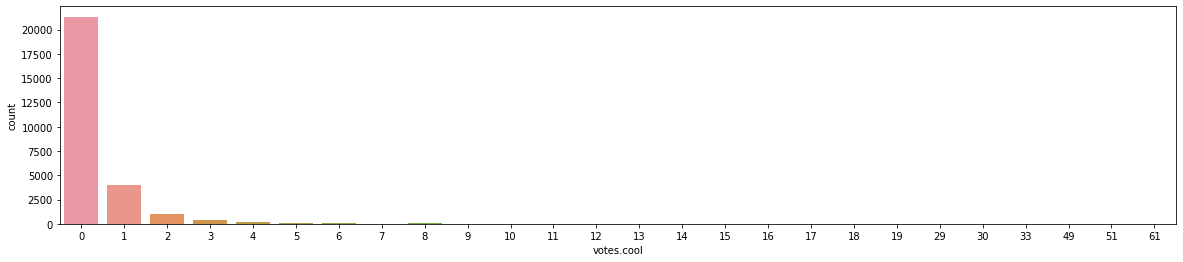

In [16]:
col_graf('votes.cool', df)

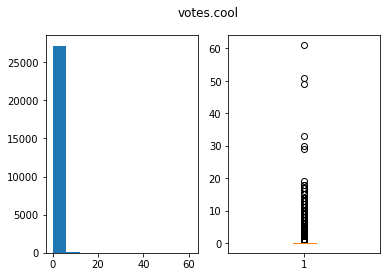

In [17]:
  # Graficos de histograma y boxplot
  fig, axes = plt.subplots(nrows= 1, ncols= 2)
  fig.suptitle('votes.cool')
  axes[0].hist(df['votes.cool'])
  axes[1].boxplot(x= 'votes.cool', data= df)
  plt.show()

In [18]:
#Proporción de votes.cool en las reviews
df['votes.cool'].value_counts(normalize= True)[0:5]

# Casi el 80% de las reviews sin votos

0    0.781385
1    0.147050
2    0.037560
3    0.014877
4    0.007878
Name: votes.cool, dtype: float64

#### Gráfico de columna "stars".

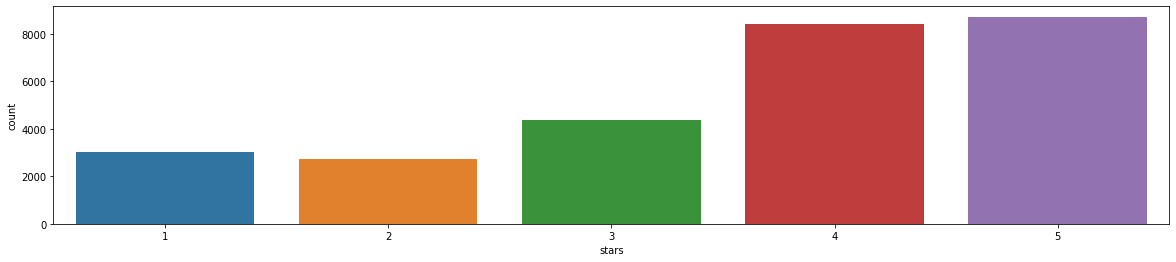

In [19]:
col_graf('stars', df)

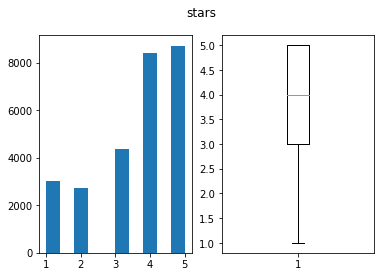

In [20]:
  # Graficos de histograma y boxplot
  fig, axes = plt.subplots(nrows= 1, ncols= 2)
  fig.suptitle('stars')
  axes[0].hist(df['stars'])
  axes[1].boxplot(x= 'stars', data= df)
  plt.show()

In [21]:
#Proporción de stars en las reviews
df['stars'].value_counts(normalize= True)[0:5]

5    0.319604
4    0.307732
3    0.160498
1    0.111543
2    0.100623
Name: stars, dtype: float64

### Business

In [22]:
# Cantidad de reviews por negocio
df['business_id'].value_counts()[:20]

3Q0QQPnHcJuX1DLCL9G9Cg    1068
mpDxBBGywUE6GRRKja3sBA     527
NeUf9FyCCIN4MEseNyqkXQ     387
jTGQUWGIVvL-aY03C5BEmw     292
NTfUFk8GyOLL1uPbEO-pVg     250
XmdTkxKyJd7TuDLoiic1kg     249
vgXE1I7c9ElcfYyZfQiN1Q     243
2X5G4Ujq0s4Wfn4TC7gX0g     243
2SwC8wqpZC4B9iFVTgYT9A     239
rgmptwPbBH1wLpiBHcbIhA     221
2Igiyhi82R8_QaaPplRmCw     213
MQnNtW1lHS-eid3QNUoUIw     212
CChwRoYVXA3QZulS8a6xOQ     211
ePP0Eqz8JKSbtdt2phiB4A     197
ym9QwkmB5ZKTyj7q5huTDw     189
dxCqGkhtXq-9fYEsX7Mf6Q     188
9SPwF-vRgtuHxciFxv5YLA     186
WuCcv_Dyd_1B_1-4jwK7sQ     182
TxKmAsKQjND5vbhBdUSyIA     180
xgK6AAhJ-cYBUCSaLzgTuw     173
Name: business_id, dtype: int64

In [23]:
df['business_id'].value_counts()

3Q0QQPnHcJuX1DLCL9G9Cg    1068
mpDxBBGywUE6GRRKja3sBA     527
NeUf9FyCCIN4MEseNyqkXQ     387
jTGQUWGIVvL-aY03C5BEmw     292
NTfUFk8GyOLL1uPbEO-pVg     250
                          ... 
FSm1Vy5jtDwsLSJxuNCOPw       1
jVVyiaDle64frINmX2hgqw       1
0zO219KZJf-5QsRNRMmELQ       1
uCUYEYPPeq8NYV6oak-WLA       1
SHg-cszL68gYqxAxjm5Qnw       1
Name: business_id, Length: 1320, dtype: int64

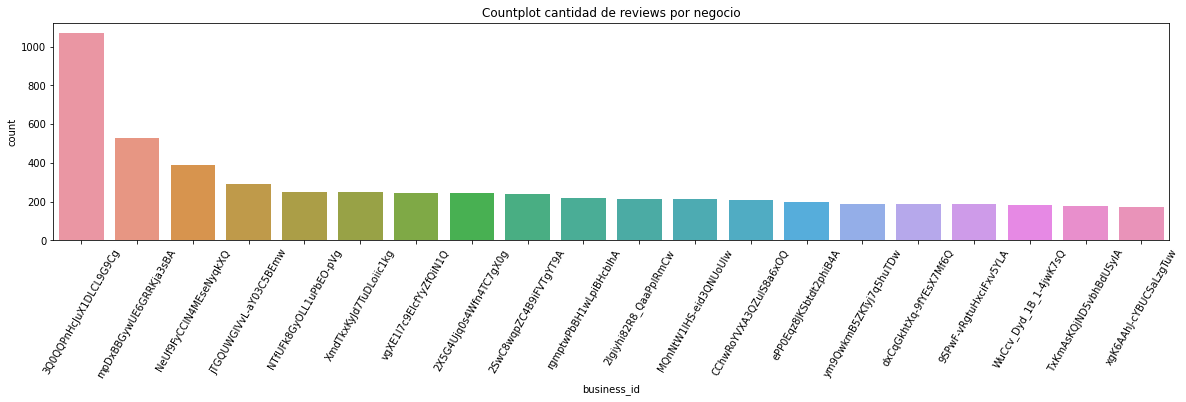

In [24]:
#Graficamos los 20 negocios con más reviews
fig = plt.figure(figsize=(20,4))
ax = plt.axes()
ax = sns.countplot(x='business_id', data=df, order=df['business_id'].value_counts()[:20].index)
plt.xticks(rotation=60)
plt.title("Countplot cantidad de reviews por negocio")
plt.show()

### **Conclusiones:**
*  Los atributos "votes..." en general no dan mucha información ya que la mayoría de las reviews no tienen votos (salvo votes.useful donde un 42% de las reviews fueron votadas).
*  El atributo "stars" (único ordinal del dataset) contiene la mayor información:
    * El 62% de las reviews tienen más de 4 estrellas (32% y 30%), aproximadamente.
    * Con 3 estrellas solo observamos un 16% de las reviews.
    * El 21% de las reviews tiene 1 o 2 estrellas (11% y 10%), respectivamente.
* Existen negocios que tienen muchas reviews y otros que muy pocas, por lo que el dataset está desbalanceado hacia un tipo particular de nicho comercial. Esperamos poder tener una idea de cual en el analisis de tópicos posterior.



# Preprocesamiento de los atributos.

Normalizacion y tokenización de las reviews.

## Remosión de atributos con poca o nula información.
Removemos el atributo "type" porque todos los datos son reviews y "votes.funny" porque el 80% de los registros no contiene votos.

In [25]:
#Eliminamos el atributo type por no aportar información al dataset (el 100% de los datos es "review")
df = df.drop(['type','votes.funny'], axis= 1)

In [26]:
df.shape

(27290, 8)

## Creamos atributos temporales(mes y año).

In [27]:
df['year'] = df['date'].dt.year #Creamos la columna de año
df['month'] = df['date'].dt.month #Creamos la columna de mes

## Removemos las stop words y pasamos el texto a minúscula.

In [28]:
#Importamos la libreria spacy y cargamos el idioma con el que vamos a trabajar
import spacy
nlp = spacy.load("en_core_web_sm")

In [29]:
#Creamos una funcion para transformar el texto a token, y pasar todo a minuscula.
def clean_stop_words(text):
  clean_text = []
  for token in nlp(text):
    if not token.is_stop:
      clean_text.append(token.text.lower())

  return " ".join(clean_text)

In [30]:
%%time
df['text'] = df['text'].apply(clean_stop_words)

CPU times: user 12min 5s, sys: 4.53 s, total: 12min 10s
Wall time: 12min 16s


In [31]:
df[['text']].head()

text
0  mr hoagie institution . walking , like throwba...
1  excellent food . superb customer service . mis...
2  yes place little dated opened weekend . staff ...
3  food great . best thing wings . wings simply f...
4  checked place past monday wing night . heard w...

## Removemos los signos de puntuación.

In [32]:
#Creamos una funcion para remover los signos de puntuacion de cada review
def clean_punct(text):
  clean_text = []
  for token in nlp(text):
    if not token.is_punct:
      clean_text.append(token.text)

  return " ".join(clean_text)

In [33]:
%%time
df['text'] = df['text'].apply(clean_punct)

CPU times: user 6min 33s, sys: 1.71 s, total: 6min 34s
Wall time: 6min 34s


In [34]:
df[['text']].head()

text
0  mr hoagie institution walking like throwback 3...
1  excellent food superb customer service miss ma...
2  yes place little dated opened weekend staff pl...
3  food great best thing wings wings simply fanta...
4  checked place past monday wing night heard win...

## Transformamos las palabras a su raíz.

In [35]:
#Creamos una funcion para convertir los token a su raiz
def lemma(text):
  clean_text = []
  for token in nlp(text):
    clean_text.append(token.lemma_)

  return " ".join(clean_text)

In [36]:
%%time
df['text'] = df['text'].apply(lemma)

CPU times: user 5min 30s, sys: 1.3 s, total: 5min 32s
Wall time: 5min 31s


In [37]:
df[['text']].head()

text
0  mr hoagie institution walk like throwback 30 y...
1  excellent food superb customer service miss ma...
2  yes place little date open weekend staff pleas...
3  food great good thing wing wing simply fantast...
4  check place past monday wing night hear wing g...

# Procesamiento del dataset

## Named Entity Recognition (NER).

In [38]:
#Definimos una función que toma un texto y nos devuelve las entidades en una lista
def get_entities(text):
  doc = nlp(text)
  ents = []
  if doc.ents: 
    for ent in doc.ents:
      ents.append(ent.text)
      
  return ents

In [39]:
#Creamos una nueva columna en nuestro dataset para las entidades
%%time
df['NER'] = df['text'].apply(get_entities)

CPU times: user 6min 8s, sys: 1.64 s, total: 6min 10s
Wall time: 6min 10s


In [40]:
df[['NER']].head(10)

NER
0  [30 year ago old, italian, year year, patty]
1                                            []
2                              [weekend, daily]
3              [night, monday, wednesday, 0.75]
4                          [past monday, night]
5                                           [1]
6                                            []
7                                            []
8             [joe polite, joe nice, year, joe]
9                                           [3]

## Explode

Es una función de pandas que nos permite separar los elementos que tenemos en una lista, en varias listas (c/u con 1 elemento).

In [41]:
%%time
df_exp_ner = df.explode('NER')
df_exp_ner.head()

CPU times: user 70.7 ms, sys: 9 ms, total: 79.7 ms
Wall time: 90.4 ms


In [42]:
#Agrupamos los NER para ver cuales son las entidades que más se repiten en nuestro set de reviews
df_exp_ner.groupby("NER").count().sort_values(by="text", ascending=False)[['text']].head(10)

text
NER           
italian   1501
2         1325
5         1178
3         1114
second     974
4          892
night      890
half       754
chinese    692
saturday   676

* Conclusión: Vemos que en el top10 de entidades se encuentran distintos tipos de restaurantes/comidas (italian, chinese y french) y números que en muchos casos representan la cantidad de estrellas en la review y su respectiva explicación.

## TextBlob
Esta librería nos permite hacer una análisis de sentimiento y polaridad a través de modelos pre-entrenados.

*   **Polarity**: Puede tomar valores en el rango [-1, 1], donde -1 define un sentimiento negativo y 1 un sentimiento positivo. Las palabras de negación, invierten la polaridad.
*   **Subjetivity**: Puede tomar valores en el rango [0, 1]. Cuantifica la cantidad de opinión personal que contiene el texto. Mientras más alta sea, significa que el texto contiene muchas opiniones personales en lugar de información basada en hechos.



In [43]:
#Importamos la librería
from textblob import TextBlob

In [44]:
#Definimos una función que nos clasifique las reviews en positivas, neutrales o negativas en función de la polarity.
def get_sentiment(text):
  sent = TextBlob(text).sentiment.polarity

  if sent > 0.1:
    return "POS"
  
  if sent >= -0.1 and sent <= 0.1:
    return "NEU"

  if sent < 0.1:
    return "NEG"

In [45]:
%%time
df["SENTIMENT"] = df["text"].apply(get_sentiment)

CPU times: user 12.6 s, sys: 40 ms, total: 12.7 s
Wall time: 12.7 s


In [46]:
df[['SENTIMENT']].head()

SENTIMENT
0       POS
1       POS
2       POS
3       POS
4       NEU

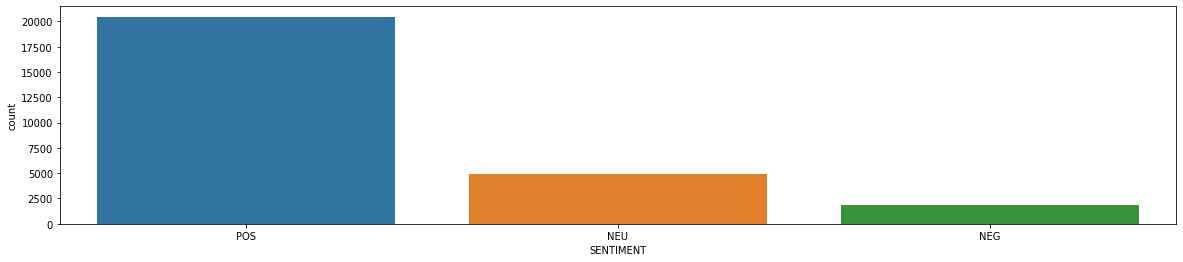

In [47]:
#Gráficamos la cantidad de reviews con cada sentimiento
col_graf('SENTIMENT', df)

In [48]:
#Proporción de reviews positivas, neutrales y negativas.
df['SENTIMENT'].value_counts(normalize= True)

POS    0.749835
NEU    0.181275
NEG    0.068890
Name: SENTIMENT, dtype: float64

* Conclusión: En el dataset, casi el 75% de las reviews tienen un sentimiento positivo y solo el 7% es negativo. Este desbalance influirá en el resultado del análisis.

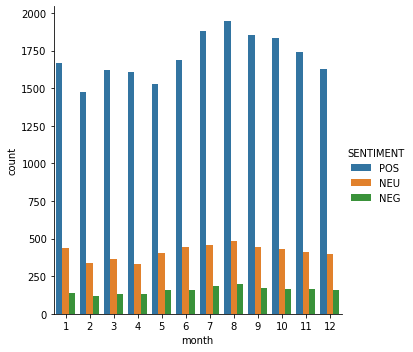

In [49]:
#Graficamos la cantidad de reviews promedio mensual, clasificados por tipo de sentimientos
sns.catplot(x= 'month', hue= 'SENTIMENT', kind= 'count', data= df)

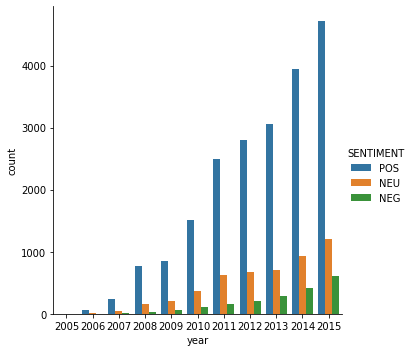

In [50]:
#Graficamos la evolución de la cantidad total de reviews por sentimiento a lo largo de los años
sns.catplot(x= 'year', hue= 'SENTIMENT', kind= 'count', data= df)

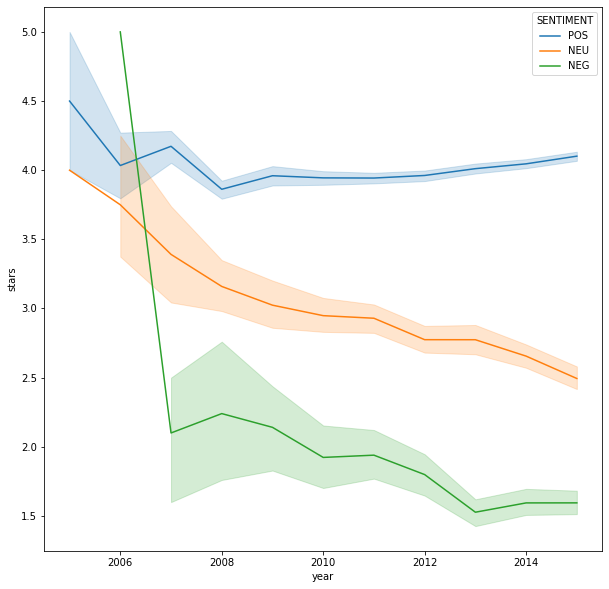

In [51]:
#Graficamos la evolución de la cantidad de stars promedio en cada sentimiento a lo largo de los años 
fig = plt.figure(figsize=(10,10))
sns.lineplot(data= df, x= 'year', y= 'stars', hue = 'SENTIMENT')

Conclusiones:
* La cantidad de reviews publicadas como promedio mensual aumenta significativamente a medida que nos acercamos a los meses 7, 8 y 9 (correspondientes al verano en el hemisferio norte).
* En cuanto a la variabilidad de stars obtenidas a lo largo de los años, la variabilidad disminuye a medida que pasa el tiempo porque aumenta el número de reviews publicadas anualmente.

In [52]:
df.head(1)

user_id               review_id  \
0  PUFPaY9KxDAcGqfsorJp3Q  Ya85v4eqdd6k9Od8HbQjyA   

                                                text  votes.cool  \
0  mr hoagie institution walk like throwback 30 y...           0   

              business_id  stars       date  votes.useful  year  month  \
0  5UmKMjUEUNdYWqANhGckJw      4 2012-08-01             0  2012      8   

                                            NER SENTIMENT  
0  [30 year ago old, italian, year year, patty]       POS

In [53]:
# Obtenemos el negocio con mas comentarios positivos.
df[df['SENTIMENT'] == 'POS']['business_id'].value_counts().head(3)

3Q0QQPnHcJuX1DLCL9G9Cg    742
mpDxBBGywUE6GRRKja3sBA    388
NeUf9FyCCIN4MEseNyqkXQ    270
Name: business_id, dtype: int64

In [54]:
# Obtenemos el negocio con mas comentarios negativos.
df[df['SENTIMENT'] == 'NEG']['business_id'].value_counts().head(3)

3Q0QQPnHcJuX1DLCL9G9Cg    76
vKtMsWeAaThimXGo9Ic_Og    33
eThu9hCL8NOjOxswQ-cFSg    28
Name: business_id, dtype: int64

* Conclusiones: El hecho que el mismo negocio tenga la mayor cantidad de comentarios positivos y negativos confirma la concentración de reviews en pocos negocios.

## Part of speech (POS)

Nos permite identificar categorías gramaticales en el texto (sustantivos, advetivos, verbos, etc.).

In [55]:
#Generamos una función para separar los sustantivos de cada review
def get_nouns(text):
  doc = nlp(text)
  nouns = []
  for token in doc:
    if token.pos_ == "NOUN":
      nouns.append(token.text)
  return nouns

In [56]:
#Generamos una función para separar los adjetivos de cada review
def get_adj(text):
  doc = nlp(text)
  adj = []
  for token in doc:
    if token.pos_ == "ADJ":
      adj.append(token.text)
  return adj

In [57]:
#Aplicamos las funciones a las reviews y creamos dos atributos nuevos
%%time
df["NOUNS"] = df["text"].apply(get_nouns)
df["ADJECTIVES"] = df["text"].apply(get_adj)

df.head()

CPU times: user 12min 41s, sys: 3.64 s, total: 12min 45s
Wall time: 12min 44s


In [58]:
# Separamos los sustantivos de cada review con un Explode
df_exp_nouns = df.explode('NOUNS')
df_exp_nouns.head()

user_id               review_id  \
0  PUFPaY9KxDAcGqfsorJp3Q  Ya85v4eqdd6k9Od8HbQjyA   
0  PUFPaY9KxDAcGqfsorJp3Q  Ya85v4eqdd6k9Od8HbQjyA   
0  PUFPaY9KxDAcGqfsorJp3Q  Ya85v4eqdd6k9Od8HbQjyA   
0  PUFPaY9KxDAcGqfsorJp3Q  Ya85v4eqdd6k9Od8HbQjyA   
0  PUFPaY9KxDAcGqfsorJp3Q  Ya85v4eqdd6k9Od8HbQjyA   

                                                text  votes.cool  \
0  mr hoagie institution walk like throwback 30 y...           0   
0  mr hoagie institution walk like throwback 30 y...           0   
0  mr hoagie institution walk like throwback 30 y...           0   
0  mr hoagie institution walk like throwback 30 y...           0   
0  mr hoagie institution walk like throwback 30 y...           0   

              business_id  stars       date  votes.useful  year  month  \
0  5UmKMjUEUNdYWqANhGckJw      4 2012-08-01             0  2012      8   
0  5UmKMjUEUNdYWqANhGckJw      4 2012-08-01             0  2012      8   
0  5UmKMjUEUNdYWqANhGckJw      4 2012-08-01             0  2012      8   
0  5UmKMjUEUNdYWqANhGckJw      4 2012-08-01             0  2012      8   
0  5UmKMjUEUNdYWqANhGckJw      4 2012-08-01             0  2012      8   

                                            NER SENTIMENT       NOUNS  \
0  [30 year ago old, italian, year year, patty]       POS        year   
0  [30 year ago old, italian, year year, patty]       POS         70s   
0  [30 year ago old, italian, year year, patty]       POS   selection   
0  [30 year ago old, italian, year year, patty]       POS        food   
0  [30 year ago old, italian, year year, patty]       POS  speciality   

                                          ADJECTIVES  
0  [old, fashioned, large, italian, good, frozen,...  
0  [old, fashioned, large, italian, good, frozen,...  
0  [old, fashioned, large, italian, good, frozen,...  
0  [old, fashioned, large, italian, good, frozen,...  
0  [old, fashioned, large, italian, good, frozen,...

In [59]:
#Separados los sustantivos, hacemos un groupby para visualizar el top 10
df_exp_nouns.groupby("NOUNS").count().sort_values(by="text", ascending=False)[['text']].head(10)

text
NOUNS            
food        14879
place       14143
time        11365
service      8797
order        8720
restaurant   5598
price        5007
people       4444
thing        4207
day          4189

* Conclusión: El top 10 de sustantivos estan directamente relacionados con restaurantes y servicio de comida, correspondiendo con lo esperado.

In [60]:
df_exp_adj = df.explode('ADJECTIVES')
df_exp_adj.head()

user_id               review_id  \
0  PUFPaY9KxDAcGqfsorJp3Q  Ya85v4eqdd6k9Od8HbQjyA   
0  PUFPaY9KxDAcGqfsorJp3Q  Ya85v4eqdd6k9Od8HbQjyA   
0  PUFPaY9KxDAcGqfsorJp3Q  Ya85v4eqdd6k9Od8HbQjyA   
0  PUFPaY9KxDAcGqfsorJp3Q  Ya85v4eqdd6k9Od8HbQjyA   
0  PUFPaY9KxDAcGqfsorJp3Q  Ya85v4eqdd6k9Od8HbQjyA   

                                                text  votes.cool  \
0  mr hoagie institution walk like throwback 30 y...           0   
0  mr hoagie institution walk like throwback 30 y...           0   
0  mr hoagie institution walk like throwback 30 y...           0   
0  mr hoagie institution walk like throwback 30 y...           0   
0  mr hoagie institution walk like throwback 30 y...           0   

              business_id  stars       date  votes.useful  year  month  \
0  5UmKMjUEUNdYWqANhGckJw      4 2012-08-01             0  2012      8   
0  5UmKMjUEUNdYWqANhGckJw      4 2012-08-01             0  2012      8   
0  5UmKMjUEUNdYWqANhGckJw      4 2012-08-01             0  2012      8   
0  5UmKMjUEUNdYWqANhGckJw      4 2012-08-01             0  2012      8   
0  5UmKMjUEUNdYWqANhGckJw      4 2012-08-01             0  2012      8   

                                            NER SENTIMENT  \
0  [30 year ago old, italian, year year, patty]       POS   
0  [30 year ago old, italian, year year, patty]       POS   
0  [30 year ago old, italian, year year, patty]       POS   
0  [30 year ago old, italian, year year, patty]       POS   
0  [30 year ago old, italian, year year, patty]       POS   

                                               NOUNS ADJECTIVES  
0  [year, 70s, selection, food, speciality, vote,...        old  
0  [year, 70s, selection, food, speciality, vote,...  fashioned  
0  [year, 70s, selection, food, speciality, vote,...      large  
0  [year, 70s, selection, food, speciality, vote,...    italian  
0  [year, 70s, selection, food, speciality, vote,...       good

In [61]:
#Separados los adjetivos, hacemos un groupby para visualizar el top 10
df_exp_adj.groupby("ADJECTIVES").count().sort_values(by="text", ascending=False)[['text']].head(10)

text
ADJECTIVES       
good        17773
great       11547
nice         5832
little       4667
friendly     3933
bad          3660
small        2830
big          2423
fresh        2415
new          2367

Podemos ver que el top 3 de adjetivos tienen una connotación positiva, de alguna manera confirmando la mayor proporción de referencias 4 y 5 estrellas dentro del set de reviews a investigar.

In [62]:
#Buscamos que adjetivos fueron los más relevantes para cada sentimiento (positivo, neutral y negativo)
adj_sent = df.explode('ADJECTIVES').groupby(['ADJECTIVES','SENTIMENT'], as_index= False).agg({'text':'count'})

adj_sent.head()

ADJECTIVES SENTIMENT  text
0          $       POS     1
1          +       NEG     3
2          +       NEU     2
3          +       POS    12
4         +1       POS     2

In [63]:
#El top10 de adjetivos positivos
adj_sent[adj_sent['SENTIMENT']== 'POS'].sort_values(by= 'text', ascending= False).head(10)

ADJECTIVES SENTIMENT   text
4532        good       POS  15421
4605       great       POS  10716
7127        nice       POS   5092
4255    friendly       POS   3479
6179      little       POS   3439
511      amazing       POS   2118
4230       fresh       POS   2091
10097    special       POS   1960
9852       small       POS   1930
3876    favorite       POS   1845

In [64]:
#El top10 de adjetivos neutrales
adj_sent[adj_sent['SENTIMENT']== 'NEU'].sort_values(by= 'text', ascending= False).head(10)

ADJECTIVES SENTIMENT  text
4531       good       NEU  2135
958         bad       NEU  1419
6178     little       NEU  1086
4604      great       NEU   777
9851      small       NEU   767
7126       nice       NEU   676
7415        old       NEU   571
1144        big       NEU   561
6238       long       NEU   558
7112        new       NEU   556

In [65]:
#El top10 de adjetivos negativos
adj_sent[adj_sent['SENTIMENT']== 'NEG'].sort_values(by= 'text', ascending= False).head(10)

ADJECTIVES SENTIMENT  text
957          bad       NEG   894
10842   terrible       NEG   274
5046    horrible       NEG   257
4530        good       NEG   217
930        awful       NEG   164
1957        cold       NEG   161
6237        long       NEG   150
6177      little       NEG   142
12447      wrong       NEG   134
9850       small       NEG   133

## Sentencizer

Función de spacy para separar un texto en distintas oraciones.

In [66]:
#Generamos una función que nos separe cada review en oraciones y las cuente
def count_senten(text):
  doc = nlp(text)
  return len(list(doc.sents))

In [67]:
%%time
df['sentences'] = df['text'].apply(count_senten)

CPU times: user 6min 12s, sys: 1.56 s, total: 6min 13s
Wall time: 6min 13s


In [68]:
#La review con más oraciones.
df.sort_values(by= 'sentences', ascending= False).head(1)

user_id               review_id  \
1010  h55P31ql7npvguOLm0Yc8A  9U0FF69TOFifIe5YS5G8Pg   

                                                   text  votes.cool  \
1010  let start review say point girlfriend go jos a...           1   

                 business_id  stars       date  votes.useful  year  month  \
1010  DMy5IG-dNrH4ARk96KngEA      1 2014-06-20             1  2014      6   

                                                    NER SENTIMENT  \
1010  [jos a. bank, ross park, mw, approximately hou...       NEU   

                                                  NOUNS  \
1010  [review, point, suit, breakdown, issue, rent, ...   

                                             ADJECTIVES  sentences  
1010  [numbered, short, honest, prior, awkward, preg...         12

In [69]:
#La review con menos oraciones.
df.sort_values(by= 'sentences', ascending= False).tail(1)

user_id               review_id  \
27289  yvLprWMot3v1HM2VHR269w  A5MuR2Y55onnWWt2KM71IA   

                                                    text  votes.cool  \
27289  stop way fort jackson     great neighborhood r...           0   

                  business_id  stars       date  votes.useful  year  month  \
27289  guh1IT9l-USl0_5naD9zaA      1 2013-08-15             0  2013      8   

                  NER SENTIMENT  \
27289  [jackson     ]       POS   

                                                   NOUNS  \
27289  [way, neighborhood, freeway, staff, room, show...   

                           ADJECTIVES  sentences  
27289  [great, friendly, dirty, safe]          1

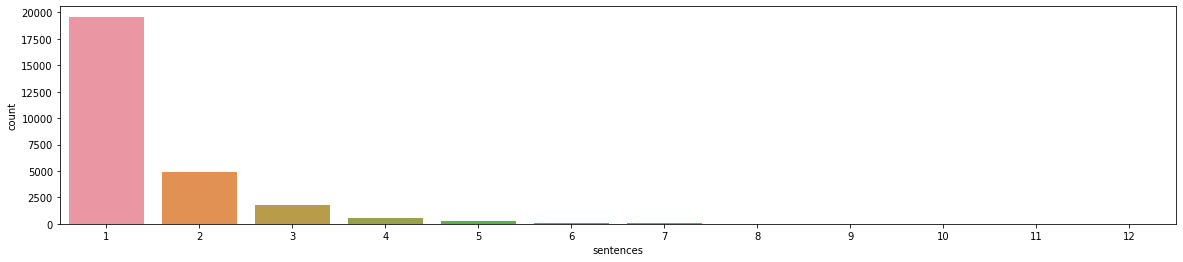

In [70]:
#Gráficamos la cantidad de oraciones por review presente en el dataset
col_graf('sentences', df)

In [71]:
#Proporción de oraciones en las reviews
df['sentences'].value_counts(normalize= True)

1     0.717882
2     0.180689
3     0.065482
4     0.021803
5     0.008501
6     0.003335
7     0.001429
8     0.000513
10    0.000183
12    0.000073
9     0.000073
11    0.000037
Name: sentences, dtype: float64

* Casi el 80% de las reviews presentes son cortas (solo con una oración).

In [72]:
# Top 10 de reviews positivas con mayor cantidad de oraciones
df_sent = df.groupby(['sentences','SENTIMENT'], as_index= False).agg({'text':'count'})
df_sent[df_sent['SENTIMENT']== 'POS'].sort_values(by= 'sentences', ascending= False).head(10)

sentences SENTIMENT  text
26         11       POS     1
25         10       POS     2
23          9       POS     1
21          8       POS     9
19          7       POS    31
17          6       POS    62
14          5       POS   170
11          4       POS   446
8           3       POS  1317
5           2       POS  3682

In [73]:
# Top 10 de reviews negativas con mayor cantidad de oraciones
df_sent = df.groupby(['sentences','SENTIMENT'], as_index= False).agg({'text':'count'})
df_sent[df_sent['SENTIMENT']== 'NEG'].sort_values(by= 'sentences', ascending= False).head(10)

sentences SENTIMENT  text
15          6       NEG     2
12          5       NEG     6
9           4       NEG    17
6           3       NEG    72
3           2       NEG   262
0           1       NEG  1521

* Conclusiones: En general las reviews positivas tienen una mayor cantidad de oraciones, probablemente por un mayor detalle sobre el restaurante, comida o servicio brindado.

## WordCloud

Instalamos la librería wordcloud y con ella visualizamos las palabras que más aparecen en nuestro dataset de reviews.

In [74]:
#Instalamos la librería y la cargamos en nuestro notebook
!pip install wordcloud

from wordcloud import WordCloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [156]:
#Definimos una función para pasar de lista a string
def list_to_string(lista):
  string = ' '
  for i in lista:
    string = i + ' ' + string

  return string

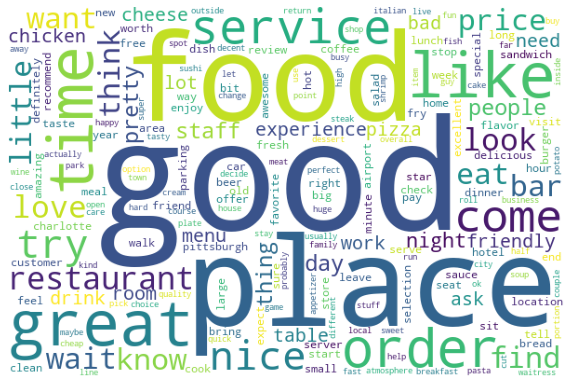

In [169]:
#Generamos la visualización con los textos de reviews depurados
word = df['text'].values

word_cloud1 = WordCloud(collocations = False,
                       background_color = 'white',
                       width = 600, height = 400,
                       stopwords = nlp.Defaults.stop_words, 
                       ).generate(list_to_string(word))

#Ploteamos la wordcloud
plt.figure(figsize=(10,15))
plt.imshow(word_cloud1)
plt.axis("off")
plt.show()

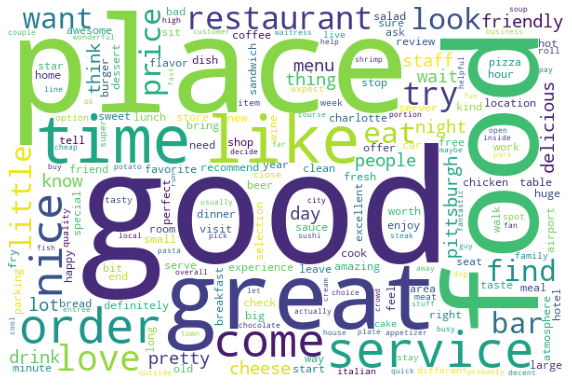

In [170]:
#Generamos un wordcloud únicamente con las entidades pertenecientes a las reviews positivas
df_POS= df[df['SENTIMENT'] == 'POS']['text'].values

word_cloud2 = WordCloud(collocations = False,
                       background_color = 'white',
                       width = 600, height = 400,
                       stopwords = nlp.Defaults.stop_words, 
                       ).generate(list_to_string(df_POS))

#Ploteamos la wordcloud
plt.figure(figsize=(10,15))
plt.imshow(word_cloud2)
plt.axis("off")
plt.show()

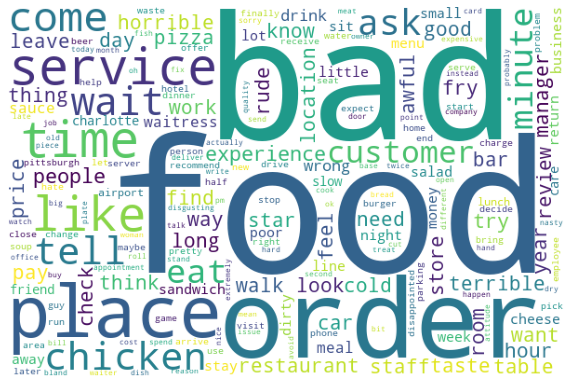

In [171]:
#Generamos un wordcloud únicamente con las entidades pertenecientes a las reviews negativas
df_NEG= df[df['SENTIMENT'] == 'NEG']['text'].values

word_cloud3 = WordCloud(collocations = False,
                       background_color = 'white',
                       width = 600, height = 400,
                       stopwords = nlp.Defaults.stop_words, 
                       ).generate(list_to_string(df_NEG))

#Ploteamos la wordcloud
plt.figure(figsize=(10,15))
plt.imshow(word_cloud3)
plt.axis("off")
plt.show()

## KeyBert
Con esta librería extraemos las keywords y el score de cada una sobre cada review

In [78]:
#Primero instalamos la librería ya que no viene por defecto en colab
!pip install keybert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 2.6 MB/s 
     |████████████████████████████████| 235 kB 11.6 MB/s 
     |████████████████████████████████| 51 kB 6.3 MB/s 
     |████████████████████████████████| 4.7 MB 47.4 MB/s 
     |████████████████████████████████| 1.2 MB 57.6 MB/s 
     |████████████████████████████████| 101 kB 10.6 MB/s 
     |████████████████████████████████| 596 kB 48.9 MB/s 
     |████████████████████████████████| 6.6 MB 36.2 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=e0720027fdd94ca313c41c003b22fb3940c7caa570de71336b5fb3cbb707fc1a
  Stored in directory: /root/.cache/pip/wheels/bf/06/fb/d59c1e5bd1dac7f6cf61ec0036cc3a10ab8fecaa6b2c3d3ee9
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      

In [79]:
#Cargamos un modelo pre entrenado para encontrar las keywords de cada review
from keybert import KeyBERT

kw_model = KeyBERT()

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [80]:
%%time
df["KEYWORDS"] = df.text.apply(lambda x: kw_model.extract_keywords(x, top_n=3, keyphrase_ngram_range=(1,1)))

df.head()

CPU times: user 1h 19min 21s, sys: 31min 12s, total: 1h 50min 34s
Wall time: 1h 16min 35s


In [81]:
#Eliminamos el score y nos quedamos con las keyword unicamente
df["KEYWORDS"] = df.KEYWORDS.apply(lambda keywords: [k[0] for k in keywords])

In [82]:
#Separamos las keywords de cada review
df_exp_key = df.explode('KEYWORDS')

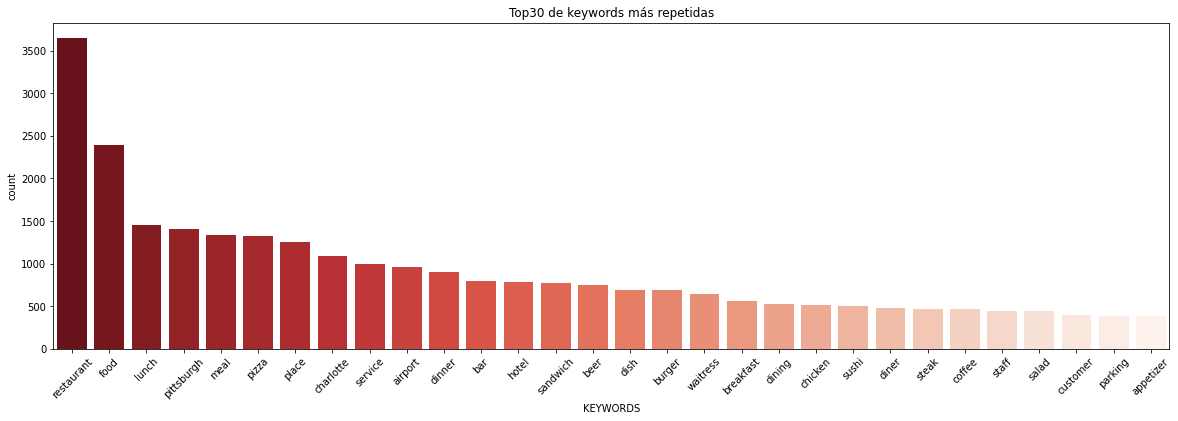

In [173]:
#Graficamos las keywords más repetidas en todas las reviews
plt.figure(figsize=(20,6))
sns.countplot(x= df_exp_key.KEYWORDS, 
              order= df_exp_key.KEYWORDS.value_counts().index[:30],
              palette='Reds_r')
plt.title('Top30 de keywords más repetidas')
plt.xticks(rotation=45)
plt.show()

In [83]:
key_sent = df_exp_key.groupby(['KEYWORDS','SENTIMENT'], as_index= False).agg({'text':'count'})

In [84]:
#Top5 de keywords en reviews positivas
key_sent[key_sent['SENTIMENT']=='POS'].sort_values(by= 'text', ascending= False).head()

KEYWORDS SENTIMENT  text
8074  restaurant       POS  2837
3802        food       POS  1869
7346  pittsburgh       POS  1191
5755       lunch       POS  1153
6033        meal       POS  1069

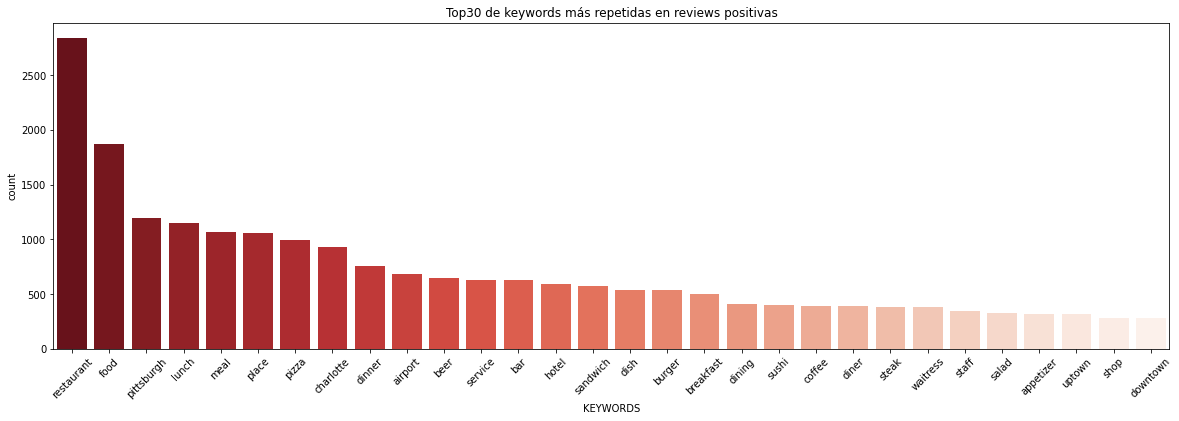

In [181]:
#Graficamos las keywords más repetidas en las reviews positivas
plt.figure(figsize=(20,6))
sns.countplot(x= df_exp_key[df_exp_key['SENTIMENT'] == 'POS']['KEYWORDS'], 
              order= df_exp_key[df_exp_key['SENTIMENT'] == 'POS']['KEYWORDS'].value_counts().index[:30],
              palette='Reds_r')
plt.title('Top30 de keywords más repetidas en reviews positivas')
plt.xticks(rotation=45)
plt.show()

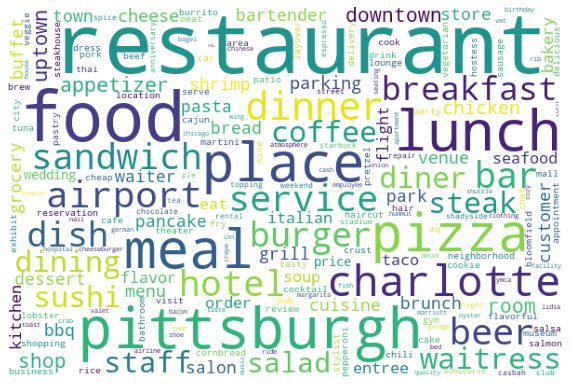

In [165]:
#Generamos un wordcloud únicamente con las keywords pertenecientes a las reviews positivas
key_POS = df[df['SENTIMENT'] == 'POS']['KEYWORDS'].explode().values

word_cloud4 = WordCloud(collocations = False,
                       background_color = 'white',
                       width = 600, height = 400,
                       stopwords = nlp.Defaults.stop_words, 
                       ).generate(list_to_string(key_POS))

#Ploteamos la wordcloud
plt.figure(figsize=(10,15))
plt.imshow(word_cloud4)
plt.axis("off")
plt.show()

In [85]:
#Top5 de keywords en reviews neutrales
key_sent[key_sent['SENTIMENT']=='NEU'].sort_values(by= 'text', ascending= False).head()

KEYWORDS SENTIMENT  text
8073  restaurant       NEU   646
3801        food       NEU   379
7356       pizza       NEU   244
5754       lunch       NEU   239
6032        meal       NEU   215

In [86]:
#Top5 de keywords en reviews negativas
key_sent[key_sent['SENTIMENT']=='NEG'].sort_values(by= 'text', ascending= False).head()

KEYWORDS SENTIMENT  text
8683     service       NEG   182
8072  restaurant       NEG   162
3800        food       NEG   149
2643    customer       NEG    99
7355       pizza       NEG    92

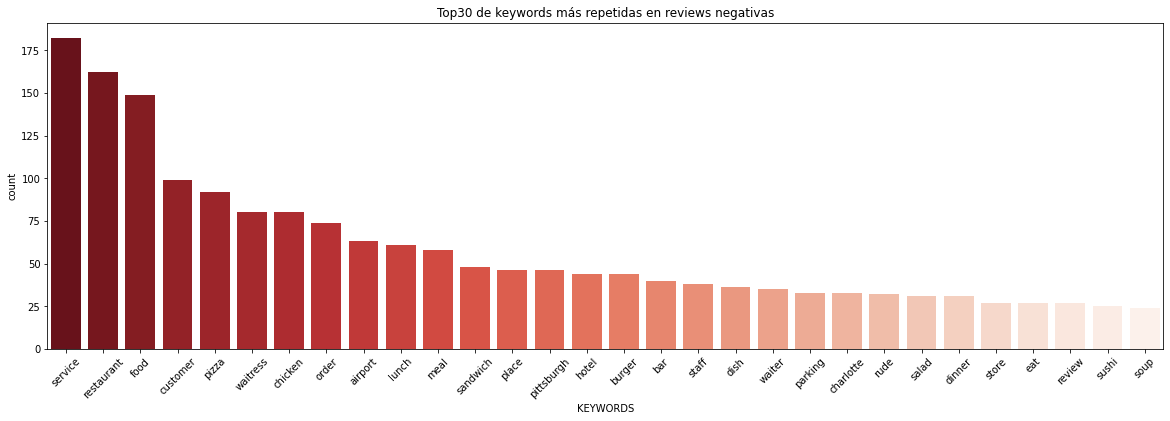

In [180]:
#Graficamos las keywords más repetidas en las reviews negativas
plt.figure(figsize=(20,6))
sns.countplot(x= df_exp_key[df_exp_key['SENTIMENT'] == 'NEG']['KEYWORDS'], 
              order= df_exp_key[df_exp_key['SENTIMENT'] == 'NEG']['KEYWORDS'].value_counts().index[:30],
              palette='Reds_r')
plt.title('Top30 de keywords más repetidas en reviews negativas')
plt.xticks(rotation=45)
plt.show()

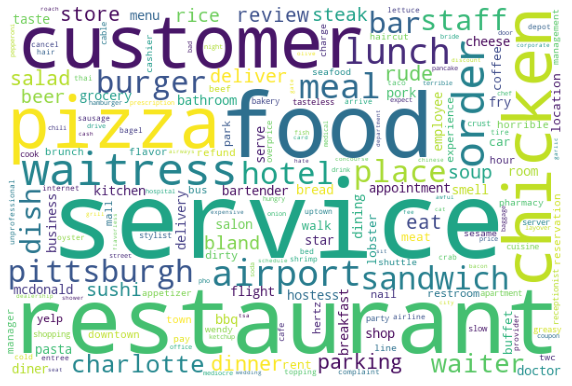

In [167]:
#Generamos un wordcloud únicamente con las keywords pertenecientes a las reviews negativas
key_NEG = df[df['SENTIMENT'] == 'NEG']['KEYWORDS'].explode().values

word_cloud5 = WordCloud(collocations = False,
                       background_color = 'white',
                       width = 600, height = 400,
                       stopwords = nlp.Defaults.stop_words, 
                       ).generate(list_to_string(key_NEG))

#Ploteamos la wordcloud
plt.figure(figsize=(10,15))
plt.imshow(word_cloud5)
plt.axis("off")
plt.show()

## BERTopic
Ahora analizamos los topicos que más se repiten en nuestra reviews, agrupandolas en una columna por nombre y popularidad.

In [118]:
#Instalamos la librería correspondiente, la importamos al notebook y creamos un modelo base
!pip install bertopic
!pip install distributed==2021.9.0    #Linea necesaria en la segunda ejecución porque bertopic da un error al intentar importarlo, en la primera ejecución no hubo problemas usando unicamente la primera linea.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 779 kB 5.1 MB/s 
     |████████████████████████████████| 1.0 MB 61.5 MB/s 
     |████████████████████████████████| 141 kB 25.9 MB/s 
  Attempting uninstall: cloudpickle
    Found existing installation: cloudpickle 1.3.0
    Uninstalling cloudpickle-1.3.0:
      Successfully uninstalled cloudpickle-1.3.0
  Attempting uninstall: dask
    Found existing installation: dask 2.12.0
    Uninstalling dask-2.12.0:
      Successfully uninstalled dask-2.12.0
  Attempting uninstall: distributed
    Found existing installation: distributed 1.25.3
    Uninstalling distributed-1.25.3:
      Successfully uninstalled distributed-1.25.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source

In [120]:
from bertopic import BERTopic

topic_model = BERTopic(calculate_probabilities=True, verbose=True, min_topic_size= 5)

In [121]:
%%time
topics, probs = topic_model.fit_transform(df['text'].values)

Batches:   0%|          | 0/853 [00:00<?, ?it/s]

2022-07-31 22:46:09,968 - BERTopic - Transformed documents to Embeddings
/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)
2022-07-31 22:47:08,620 - BERTopic - Reduced dimensionality
2022-07-31 22:55:47,949 - BERTopic - Clustered reduced embeddings


CPU times: user 26min 18s, sys: 22.2 s, total: 26min 40s
Wall time: 26min 9s


In [122]:
topics_data = topic_model.get_topic_info()
topics_data

Topic  Count                                 Name
0       -1  10111               -1_food_place_good_bar
1        0   1095       0_airport_flight_terminal_gate
2        1    935        1_pizza_crust_slice_pepperoni
3        2    807                2_hotel_room_stay_bed
4        3    778  3_pittsburgh_primanti_sandwich_bros
..     ...    ...                                  ...
384    383      5       383_carded_louie_saloon_killem
385    384      5            384_diner_tom_toast_retro
386    385      5   385_empanda_begins_hobbit_smashing
387    386      5     386_lyonnaise_dor_omelette_diner
388    387      5      387_district_dressed_strip_rhey

[389 rows x 3 columns]

In [123]:
#Agregamos las columnas topic_name y topic_popularity a nuestro dataset
df['TOPIC_ID'] = topics
df = df.merge(topics_data, left_on= 'TOPIC_ID', right_on= 'Topic', how= 'left')
df = df.rename(columns= {'Name': 'TOPIC_NAME', 'Count': 'TOPIC_POPULARITY'})
df = df.drop(['Topic'], axis=1)
df.head()

user_id               review_id  \
0  PUFPaY9KxDAcGqfsorJp3Q  Ya85v4eqdd6k9Od8HbQjyA   
1  Iu6AxdBYGR4A0wspR9BYHA  KPvLNJ21_4wbYNctrOwWdQ   
2  auESFwWvW42h6alXgFxAXQ  fFSoGV46Yxuwbr3fHNuZig   
3  uK8tzraOp4M5u3uYrqIBXg  Di3exaUCFNw1V4kSNW5pgA   
4  I_47G-R2_egp7ME5u_ltew  0Lua2-PbqEQMjD9r89-asw   

                                                text  votes.cool  \
0  mr hoagie institution walk like throwback 30 y...           0   
1  excellent food superb customer service miss ma...           0   
2  yes place little date open weekend staff pleas...           0   
3  food great good thing wing wing simply fantast...           0   
4  check place past monday wing night hear wing g...           0   

              business_id  stars       date  votes.useful  year  month  \
0  5UmKMjUEUNdYWqANhGckJw      4 2012-08-01             0  2012      8   
1  5UmKMjUEUNdYWqANhGckJw      5 2014-02-13             0  2014      2   
2  5UmKMjUEUNdYWqANhGckJw      5 2015-10-31             0  2015     10   
3  UsFtqoBl7naz8AVUBZMjQQ      5 2013-11-08             0  2013     11   
4  UsFtqoBl7naz8AVUBZMjQQ      3 2014-03-29             0  2014      3   

                                            NER SENTIMENT  \
0  [30 year ago old, italian, year year, patty]       POS   
1                                            []       POS   
2                              [weekend, daily]       POS   
3              [night, monday, wednesday, 0.75]       POS   
4                          [past monday, night]       NEU   

                                               NOUNS  \
0  [year, 70s, selection, food, speciality, vote,...   
1  [food, superb, customer, service, place, tradi...   
2  [date, weekend, staff, order, spot, veggie, ic...   
3  [food, thing, wing, wing, salt, wing, wing, ni...   
4  [place, wing, night, wing, decide, time, check...   

                                          ADJECTIVES  sentences  \
0  [old, fashioned, large, italian, good, frozen,...          1   
1                          [excellent, great, steep]          1   
2  [little, open, pleasant, fast, fresh, daily, s...          1   
3  [great, good, fantastic, popular, seasoned, ni...          1   
4  [great, nice, wet, garlic, bold, thin, thin, a...          1   

                   KEYWORDS  TOPIC_ID  TOPIC_POPULARITY  \
0  [subway, hoagie, burger]       250                10   
1    [mario, machine, food]        -1             10111   
2     [food, topping, date]        -1             10111   
3       [wing, bar, dining]        -1             10111   
4      [wing, menu, flavor]       140                21   

                             TOPIC_NAME  
0  250_silky_chester_devonshire_norfolk  
1                -1_food_place_good_bar  
2                -1_food_place_good_bar  
3                -1_food_place_good_bar  
4           140_wing_cent_garlic_crispy

In [124]:
#Hacemos un gráfico interactivo con la clusterización de los topicos de nuestro dataset
topic_model.visualize_topics()

Conclusiones finales:
- El dataset tiene una mezcla de tipo de variables, pero algunas no son muy informativas (por ejemplo, type, votes.cool, votes.funny, etc.). Estas variables fueron manejadas adecuadamente.
- La variable date nos permitio descubrir de informacion dentro del dataset, donde las observaciones se van haciendo mas numerosas a medida que pasa el tiempo. Esto podria estar escondiendo la variabilidad/información de las observaciones mas antiguas.
- Al analizar las variable "business_id" encontramos que hay negocios que tienen muchas opiniones y algunos muy pocas. Esto constituye un sesgo hacia los nichos comerciales de los negocios que tienen mas observaciones en el dataset.
- En su conjunto, el analisis nos sugiere que los negocios que más opiniones tienen en el dataset son aquellos ubicados en lugares muy transitados. La mayoria de estas valoraciones tiene una polaridad positiva, con puntuaciones (estrellas) > 3.